In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mlelec.data.dataset import precomputed_molecules, MoleculeDataset, MLDataset
import torch
from ase.io import read
import ase
from mlelec.models.linear import LinearTargetModel

In [3]:
import sys 
import pyscf, pyscfad
print(sys.version_info)
print(pyscf.__version__)
print(pyscfad.__version__)


sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
2.3.0
0.1.2


In [4]:
water_data = MoleculeDataset(mol_name='water_1000', frame_slice=slice(0,100),  device='cuda', aux=['overlap', 'orbitals'], target=["fock", "dipole_moment"])
ml_data = MLDataset(molecule_data=water_data, device ='cuda', model_strategy = "coupled")
if ml_data.features is None: 
    ml_data.features = mlelec.features.acdc.compute_features(ml_data.molecule_data, ml_data.device)

Loading structures
examples/data/water_1000/sto-3g/fock.hickle
examples/data/water_1000/sto-3g/dipole_moment.hickle
{'fock': tensor([[[-2.0247e+01, -5.1670e+00, -2.6695e-02,  ...,  6.7615e-19,
          -1.5899e+00, -1.1728e+00],
         [-5.1670e+00, -2.4826e+00, -1.6115e-01,  ...,  5.5728e-19,
          -1.2659e+00, -1.0295e+00],
         [-2.6695e-02, -1.6115e-01, -4.2632e-01,  ...,  1.9056e-17,
          -6.1406e-01, -1.0659e-01],
         ...,
         [ 6.7615e-19,  5.5728e-19,  1.9056e-17,  ..., -4.0814e-01,
          -2.3783e-17,  2.4632e-17],
         [-1.5899e+00, -1.2659e+00, -6.1406e-01,  ..., -2.3783e-17,
          -8.0231e-01, -5.7995e-01],
         [-1.1728e+00, -1.0295e+00, -1.0659e-01,  ...,  2.4632e-17,
          -5.7995e-01, -5.9604e-01]],

        [[-2.0234e+01, -5.1672e+00, -2.3115e-02,  ...,  1.1899e-19,
          -1.5852e+00, -1.5562e+00],
         [-5.1672e+00, -2.5008e+00, -1.3644e-01,  ..., -6.4699e-20,
          -1.2619e+00, -1.2463e+00],
         [-2.3115e-

In [5]:
ml_data._shuffle(random_seed=5381)
ml_data._split_indices(train_frac=0.7, val_frac=0.2)

In [ ]:
if self.features is None:
                print
               hypers = kwargs.get("hypers", None)
            if hypers is None:
                print("Computing features with default hypers")
                hypers = {
                    "cutoff": 4.0,
                    "max_radial": 6,
                    "max_angular": 3,
                    "atomic_gaussian_width": 0.3,
                    "center_atom_weight": 1,
                    "radial_basis": {"Gto": {}},
                    "cutoff_function": {"ShiftedCosine": {"width": 0.1}},
                }
            single = single_center_features(dataset.structures, hypers, order_nu = 2, lcut = hypers["max_angular"])
            if isinstance(dataset.target, SingleCenter):
                self.features = single
            elif isinstance(dataset.target, TwoCenter):
                pairs = pair_features(
                    dataset.structures,
                    hypers,
                    order_nu=1,
                    lcut = hypers["max_angular"],
                    feature_names=single[0].properties.names,
                )
                self.features = twocenter_hermitian_features(single, pairs)
                

In [117]:
import argparse
parser = argparse.ArgumentParser()

parser.add_argument('--model_type', type=str, default="acdc")
parser.add_argument('--feature_path', type=str, default=None)
parser.add_argument('--max_radial', type=int, default=4)
parser.add_argument('--max_angular', type=int, default=2)
args= parser.parse_args()


In [116]:
if args.model_type == 'acdc' and args.feature_path is None: 
    
    if 

NameError: name 'feature' is not defined

In [55]:
#instantiate model based on args['model_type'] -'linear', 'se3-transformer'..
def instantiate_model(args, dataset: MLDataset, device):
    if args.model_type == 'linear':
        if features 
        model = LinearTargetModel(dataset, features = features, device =device)
    

    elif args.model_type == 'se3-transformer':
        raise NotImplementedError
        # model = SE3TransformerTargetModel(dataset, device)
    else:
        raise NotImplementedError
    return model

model = get_model(args, trainset, device) # trainset to get the block keys 


tensor([ 7,  9, 23, 25, 51, 55, 59, 65, 68, 87, 91])

In [15]:
ml_data._set_features(model.features)


In [10]:
import torch.utils.data as data

In [100]:
# sampler = data.sampler.SubsetRandomSampler(indices = ml_data.train_idx)
train_sampler = data.sampler.SubsetRandomSampler(ml_data.train_idx)
train_sampler = data.sampler.BatchSampler(train_sampler, batch_size=4, drop_last=False)

val_sampler = data.sampler.SubsetRandomSampler(ml_data.val_idx)
val_sampler = data.sampler.BatchSampler(val_sampler, batch_size=4, drop_last=False)

test_sampler = data.sampler.SubsetRandomSampler(ml_data.test_idx)
test_sampler = data.sampler.BatchSampler(test_sampler, batch_size=4, drop_last=False)

In [101]:
from torch.utils import data 
import metatensor
def collate(batch):
    x = batch[0][0] 
    y = batch[0][1]
    return x, y

train_loader = data.DataLoader(
                ml_data,
                sampler = train_sampler,
                collate_fn = collate,
            )
val_loader = data.DataLoader(
                ml_data,
                sampler = val_sampler,
                collate_fn = collate,
            )

test_loader = data.DataLoader(
                ml_data,
                sampler = test_sampler,
                collate_fn = collate,
            )


In [7]:
for f in ml_data.structures:
    f.pbc = False

## training on a tiny dataset for now 

In [8]:
model = LinearTargetModel(dataset = ml_data, metrics = "l2_loss", nlayers = 1, nhidden = 16, bias = False, device = 'cuda')


Computing features with default hypers
cuda:0 cuda
MLP(
  (mlp): Sequential(
    (0): Linear(in_features=576, out_features=16, bias=False)
    (1): Linear(in_features=16, out_features=1, bias=False)
  )
)
cuda:0 cuda
MLP(
  (mlp): Sequential(
    (0): Linear(in_features=576, out_features=16, bias=False)
    (1): Linear(in_features=16, out_features=1, bias=False)
  )
)
cuda:0 cuda
MLP(
  (mlp): Sequential(
    (0): Linear(in_features=864, out_features=16, bias=False)
    (1): Linear(in_features=16, out_features=1, bias=False)
  )
)
cuda:0 cuda
MLP(
  (mlp): Sequential(
    (0): Linear(in_features=576, out_features=16, bias=False)
    (1): Linear(in_features=16, out_features=1, bias=False)
  )
)
cuda:0 cuda
MLP(
  (mlp): Sequential(
    (0): Linear(in_features=864, out_features=16, bias=False)
    (1): Linear(in_features=16, out_features=1, bias=False)
  )
)
cuda:0 cuda
MLP(
  (mlp): Sequential(
    (0): Linear(in_features=576, out_features=16, bias=False)
    (1): Linear(in_features=16,

In [ ]:
model.train_model(nepochs=100, batch_size=32, lr=1e-3, weight_decay=0.0, verbose=True, log_interval=10)

In [33]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10, verbose=True)
losses= []

In [38]:

for epoch in range(700):
    optimizer.zero_grad()
    loss = model.forward()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())  
    # scheduler.step(loss)
    if epoch%10 == 0:
        print(torch.sqrt(loss.detach()))

tensor(1.3400, device='cuda:0', dtype=torch.float64)
tensor(1.3346, device='cuda:0', dtype=torch.float64)
tensor(1.3292, device='cuda:0', dtype=torch.float64)
tensor(1.3235, device='cuda:0', dtype=torch.float64)
tensor(1.3179, device='cuda:0', dtype=torch.float64)
tensor(1.3124, device='cuda:0', dtype=torch.float64)
tensor(1.3072, device='cuda:0', dtype=torch.float64)
tensor(1.3017, device='cuda:0', dtype=torch.float64)
tensor(1.2972, device='cuda:0', dtype=torch.float64)
tensor(1.2913, device='cuda:0', dtype=torch.float64)
tensor(1.2860, device='cuda:0', dtype=torch.float64)
tensor(1.2808, device='cuda:0', dtype=torch.float64)
tensor(1.2755, device='cuda:0', dtype=torch.float64)
tensor(1.2704, device='cuda:0', dtype=torch.float64)
tensor(1.2659, device='cuda:0', dtype=torch.float64)
tensor(1.2605, device='cuda:0', dtype=torch.float64)
tensor(1.2554, device='cuda:0', dtype=torch.float64)
tensor(1.2511, device='cuda:0', dtype=torch.float64)
tensor(1.2456, device='cuda:0', dtype=torch.fl

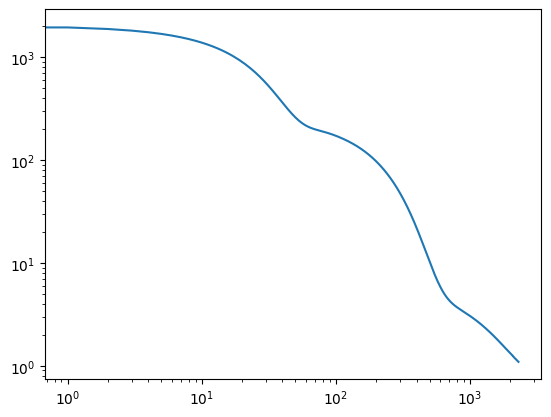

In [40]:
import matplotlib.pyplot as plt
plt.loglog(losses)

In [41]:
pred = model.forward()

In [43]:
model.

tensor(1.0908, device='cuda:0', dtype=torch.float64, grad_fn=<SumBackward0>)

The default features and model is quite bad - so no wonder losses are high

## Predictions

In [36]:
linmod.forward()
fock = linmod.reconstructed_tensor
print(fock.shape)
print(fock.dtype)

cuda:0 cuda:0
torch.Size([10, 7, 7])
torch.float32


## plugging in predicted fock matrix into pyscfad

In [37]:

import os
os.environ['PYSCFAD_BACKEND']='torch'

import torch
from pyscf import gto

from pyscfad import numpy as np
from pyscfad import ops
from pyscfad.ml.scf import hf
import pyscf.pbc.tools.pyscf_ase as pyscf_ase


tensor([[-23.2849,  -2.7638,   0.7262,   0.0000,   0.8035,  -1.1535,  -1.3145],
        [ -2.7638,  -8.5905,   0.7166,   0.0000,   0.8957,  -2.0820,  -2.2938],
        [  0.7262,   0.7166,  -1.8219,   0.0000,   0.2043,  -0.6207,   0.9639],
        [  0.0000,   0.0000,   0.0000,  -4.7920,   0.0000,   0.0000,   0.0000],
        [  0.8035,   0.8957,   0.2043,   0.0000,  -1.9606,   0.9687,  -0.3907],
        [ -1.1535,  -2.0820,  -0.6207,   0.0000,   0.9687,  -3.2221,  -1.4339],
        [ -1.3145,  -2.2938,   0.9639,   0.0000,  -0.3907,  -1.4339,  -3.1479]],
       device='cuda:0', dtype=torch.float64, requires_grad=True)

In [55]:
def _instantiate_pyscf_mol(frames, basis= 'sto-3g'):
    mol = gto.Mole()
    mol.atom = pyscf_ase.ase_atoms_to_pyscf(frame)
    mol.basis = basis
    mol.build()
    return mol

f = linmod.reconstructed_tensor[0].type(torch.float64)
f = torch.autograd.Variable(linmod.reconstructed_tensor[0].type(torch.float64), requires_grad=True)

mf = hf.SCF(mol)

mo_energy, mo_coeff = mf.eig(f, s = torch.eye(f.shape[-1], dtype = f.dtype))
mo_occ = mf.get_occ(mo_energy) # get_occ returns a numpy array
mo_occ = ops.convert_to_tensor(mo_occ)


In [47]:
dm1 = mf.make_rdm1(mo_coeff, mo_occ)
dip = mf.dip_moment(dm=dm1)
dip_norm = np.linalg.norm(dip)
dip_norm.backward(retain_graph=True)

Dipole moment(X, Y, Z, Debye): -3.31932, -2.92907,  0.84495


In [53]:
print(f.grad)
# print(fock.grad)

tensor([[ 1.7105e-03,  6.3625e-03,  2.9021e-02, -2.2379e-03,  1.1759e-02,
         -3.4497e-02,  9.9262e-03],
        [ 6.3625e-03,  2.6275e-02, -4.1789e-03, -9.8700e-03,  1.0243e-01,
         -7.3472e-02, -4.3468e-02],
        [ 2.9021e-02, -4.1789e-03,  1.0441e-01, -1.0558e-01, -3.9019e-01,
         -5.5819e-01, -2.6806e-01],
        [-2.2379e-03, -9.8700e-03, -1.0558e-01,  6.9081e-18, -7.8187e-03,
          5.6591e-02, -5.4898e-02],
        [ 1.1759e-02,  1.0243e-01, -3.9019e-01, -7.8187e-03,  5.4390e-01,
         -2.1696e-01, -9.5179e-02],
        [-3.4497e-02, -7.3472e-02, -5.5819e-01,  5.6591e-02, -2.1696e-01,
         -1.5031e-02,  3.6295e-01],
        [ 9.9262e-03, -4.3468e-02, -2.6806e-01, -5.4898e-02, -9.5179e-02,
          3.6295e-01, -6.6127e-01]], device='cuda:0', dtype=torch.float64)


In [85]:
all_fock = linmod.reconstructed_tensor
af = []
all_dipole = []
for i, frame in enumerate(h_ml.structures):
    mol = _instantiate_pyscf_mol(frame)
    f= linmod.reconstructed_tensor[i].type(torch.float64)
    f.retain_grad()
#     f = torch.autograd.Variable(linmod.reconstructed_tensor[i].type(torch.float64), requires_grad=True)
    af.append(f)
    mf = hf.SCF(mol)
    mo_energy, mo_coeff = mf.eig(f, s = torch.eye(f.shape[-1], dtype = f.dtype))
    mo_occ = mf.get_occ(mo_energy) # get_occ returns a numpy array
    mo_occ = ops.convert_to_tensor(mo_occ)
    
    dm1 = mf.make_rdm1(mo_coeff, mo_occ)
    dip = mf.dip_moment(dm=dm1)
    all_dipole.append(dip)
all_dipole = torch.stack(all_dipole)
af = torch.autograd.Variable(torch.stack(af), requires_grad=True)

Dipole moment(X, Y, Z, Debye): -3.31932, -2.92907,  0.84495
Dipole moment(X, Y, Z, Debye): -2.80104, -2.80665,  0.49420
Dipole moment(X, Y, Z, Debye): -0.97410,  0.16333, -0.03832
Dipole moment(X, Y, Z, Debye):  0.43273, -0.39412, -0.10863
Dipole moment(X, Y, Z, Debye):  0.55159, -0.21967, -0.12267
Dipole moment(X, Y, Z, Debye): -2.63093, -2.96524,  0.56775
Dipole moment(X, Y, Z, Debye):  0.39313,  0.14061,  0.05585
Dipole moment(X, Y, Z, Debye): -3.56483,  1.09624,  1.08741
Dipole moment(X, Y, Z, Debye): -3.06630, -2.97490,  0.84684
Dipole moment(X, Y, Z, Debye): -1.19815,  1.15317,  0.41941


In [87]:
linmod.reconstructed_tensor[i]

tensor([[-22.7867,  -2.6760,   0.6460,   0.0000,   0.5339,  -1.3304,  -1.3777],
        [ -2.6760,  -8.3764,   0.6752,   0.0000,   0.6351,  -2.2956,  -2.3194],
        [  0.6460,   0.6752,  -1.9946,   0.0000,  -0.6772,  -0.3064,   0.8821],
        [  0.0000,   0.0000,   0.0000,  -4.6945,   0.0000,   0.0000,   0.0000],
        [  0.5339,   0.6351,  -0.6772,   0.0000,  -1.5873,   1.0782,  -0.4898],
        [ -1.3304,  -2.2956,  -0.3064,   0.0000,   1.0782,  -2.6454,  -1.2547],
        [ -1.3777,  -2.3194,   0.8821,   0.0000,  -0.4898,  -1.2547,  -2.4765]],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [88]:
all_dip_norm = np.linalg.norm(all_dipole)
all_dip_norm.backward(retain_graph=True)

In [95]:
f.grad

tensor([[-1.5416e-01, -1.8086e+00, -3.4247e+00,  3.1234e-01,  1.9814e+00,
         -1.3653e+00,  6.3304e+00],
        [-1.8086e+00, -3.1297e+00, -1.0496e+02,  7.0729e+00,  3.7506e+01,
         -6.8787e+01,  6.5364e+01],
        [-3.4247e+00, -1.0496e+02,  8.1099e+01, -4.3874e+00,  5.3934e+01,
          1.6191e+02,  1.5759e+02],
        [ 3.1234e-01,  7.0729e+00, -4.3874e+00,  4.8404e-15, -2.1587e+00,
         -7.4399e+00, -1.4155e+01],
        [ 1.9814e+00,  3.7506e+01,  5.3934e+01, -2.1587e+00, -4.9764e+01,
          1.3806e+00, -9.7868e+01],
        [-1.3653e+00, -6.8787e+01,  1.6191e+02, -7.4399e+00,  1.3806e+00,
          1.9740e+02,  3.9760e+01],
        [ 6.3304e+00,  6.5364e+01,  1.5759e+02, -1.4155e+01, -9.7868e+01,
          3.9760e+01, -2.2546e+02]], device='cuda:0', dtype=torch.float64)

In [93]:
NORM = 120
los = torch.pow((all_dip_norm - NORM),2)
print(los)

tensor(12199.2923, device='cuda:0', dtype=torch.float64,
       grad_fn=<PowBackward0>)


In [94]:
los.backward()

In [96]:
linmod.forward()

ValueError: 'species_i' not found in the dimensions of these Labels

In [ ]:
https://stackoverflow.com/questions/62067400/understanding-accumulated-gradients-in-pytorch
    

In [16]:
# grad of dipole moment


for ifr, pred in enumerate(predicted_xyz[:]):
    #gradient of the x component of the p vector
    gradients[ifr][:, 0,:] = torch.autograd.grad(pred[0], systems[ifr].positions, retain_graph = True)[0]
    #gradient of the y component of the p vector
    gradients[ifr][:, 1,:] = torch.autograd.grad(pred[1], systems[ifr].positions, retain_graph = True)[0]
    #gradient of the z component of the p vector
    gradients[ifr][:, 2,:] = torch.autograd.grad(pred[2], systems[ifr].positions, retain_graph = True)[0]

## Calculate the dipole moment of water molecule

In [8]:
from mlelec.data.pyscf_calculator import calculator

calc= calculator(
        path="examples/data/water_1000/",
        mol_name="water_1000",
        frame_slice="0:1",
        target = ['fock', 'dipole_moment'],
    )
calc.calculate(   basis_set="sto-3g", verbose = 1)

Loading
Number of frames:  1
['0 O 1s    ', '0 O 2s    ', '0 O 2px   ', '0 O 2py   ', '0 O 2pz   ', '1 H 1s    ', '2 H 1s    ']
converged: True
Dipole moment(X, Y, Z, Debye):  1.50259,  1.24095,  0.00000


In [10]:
calc.ao_labels

defaultdict(list, {8: ['1s', '2s', '2px', '2py', '2pz'], 1: ['1s']})

In [11]:
calc.save_results(path= 'examples/data/water/')

1 s
2 s
2 px
2 py
2 pz
1 s
{8: [[1, 0, 0], [2, 0, 0], [2, 1, 1], [2, 1, -1], [2, 1, 0]], 1: [[1, 0, 0]]}
All done, results saved at:  examples/data/water/


/home/nigam/miniconda3/lib/python3.11/site-packages/hickle/lookup.py:1491: SerializedWarning: 'Tensor' type not understood, data is serialized:
  warnings.warn(


In [7]:
calc.results['dipole_moment']


tensor([[ 1.5026e+00,  1.2409e+00,  7.1681e-18],
        [ 1.2997e+00,  1.4442e+00, -4.3135e-18],
        [-1.4773e+00, -3.6498e-12,  8.5239e-01],
        ...,
        [ 1.0386e+00,  1.2824e+00,  8.0541e-18],
        [ 6.6561e-01,  1.3449e+00,  1.0759e-16],
        [ 1.3267e+00,  1.3025e+00,  2.3448e-17]], dtype=torch.float64)

In [8]:
calc.results['fock']

tensor([[[-2.0247e+01, -5.1670e+00, -2.6695e-02,  ...,  6.7615e-19,
          -1.5899e+00, -1.1728e+00],
         [-5.1670e+00, -2.4826e+00, -1.6115e-01,  ...,  5.5728e-19,
          -1.2659e+00, -1.0295e+00],
         [-2.6695e-02, -1.6115e-01, -4.2632e-01,  ...,  1.9056e-17,
          -6.1406e-01, -1.0659e-01],
         ...,
         [ 6.7615e-19,  5.5728e-19,  1.9056e-17,  ..., -4.0814e-01,
          -2.3783e-17,  2.4632e-17],
         [-1.5899e+00, -1.2659e+00, -6.1406e-01,  ..., -2.3783e-17,
          -8.0231e-01, -5.7995e-01],
         [-1.1728e+00, -1.0295e+00, -1.0659e-01,  ...,  2.4632e-17,
          -5.7995e-01, -5.9604e-01]],

        [[-2.0234e+01, -5.1672e+00, -2.3115e-02,  ...,  1.1899e-19,
          -1.5852e+00, -1.5562e+00],
         [-5.1672e+00, -2.5008e+00, -1.3644e-01,  ..., -6.4699e-20,
          -1.2619e+00, -1.2463e+00],
         [-2.3115e-02, -1.3644e-01, -4.2727e-01,  ...,  2.0885e-17,
          -5.9718e-01, -1.8235e-03],
         ...,
         [ 1.1899e-19, -6